In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import time

In [3]:
os.getcwd()

'/Users/balakrishnareddy/programming_practise/Projects/data-analytics-using-pandas'

# To get the data from all the sheets, merge, clean to remove unwanted rows, convert string integers to actual integers

### Sorts the months so as to read in proper order 

In [51]:
month_map = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
sorted_months = sorted(months_list, key=lambda month: month_map[month.split('_')[1][:3]])
print(sorted_months)

['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv', 'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv', 'Sales_July_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv', 'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv']


### Read the csv files, concatenate them into one single DataFrame

In [129]:
data = pd.DataFrame()
for month in sorted_months:
#     print(month)
    dt = pd.read_csv('Sales_Data/'+month)
    if data.empty:
        data = dt
        continue
    data = pd.concat([data,dt])
    

### Clean the data to remove unwanted rows, and save it to a big final sheet

In [130]:
print("actual data frame shape", data.shape)
data.drop(data[data['Price Each'] == 'Price Each'].index, inplace=True)
print("after dropping the unwanted data", data.shape)
data.to_csv('Sales_data_2019.csv', index=False)

actual data frame shape (186850, 6)
after dropping the unwanted data (183271, 6)


# Entire dataset can be imported here and do the data analytics

### Read the final sheet from csv file

In [3]:
data = pd.read_csv('Sales_data_2019.csv')

### Convert valid numeric values to numeric ones, drop na values


In [4]:
data.dropna(inplace=True)
data.reset_index(inplace=True)

try:
    data['Order ID'] = pd.to_numeric(data['Order ID']).astype('int32')
    data['Price Each'] = pd.to_numeric(data['Price Each']).astype('float')
    data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered']).astype('int32')
    data['Order Date'] = pd.to_datetime(data['Order Date'])
except Exception as x:
    print(x)

In [5]:
# data.dropna(inplace=True)
# data.reset_index()

### Check the best month for overall sales

In [281]:
""" There are multiple ways to filter out month. Below are the two ways which I found"""
p = time.time()
data[(data['Order Date'] < pd.to_datetime('2019-05-01 00:00:00')) & (data['Order Date'] >= pd.to_datetime('2019-04-01 00:00:00'))]
q = time.time()
print(q-p)
"""or"""
p = time.time()
data[data['Order Date'].dt.month == 4.0]   # This is easy to read
q = time.time()
print(q-p)

0.00812387466430664
0.01485300064086914


In [6]:
data['Month'] = data['Order Date'].dt.month
data['Revenue'] = data["Quantity Ordered"]*data['Price Each']
new_table = data.groupby('Month').sum()

/var/folders/pw/1y12vnxd6rsd7mk1hsc9fplm0000gn/T/ipykernel_45982/619268665.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_table = data.groupby('Month').sum()


In [7]:
new_table

# dic = {}
# max_month = 0
# max_rev = 0
# for i in range(1,13):
#     dic[i] = sum(data['Revenue'][data['Order Date'].dt.month == i])
#     if dic[i] > max_rev:
#         max_rev = dic[i]
#         max_month = i

,Order ID,Quantity Ordered,Price Each,Revenue
Month,,,,
1,1391148846,10670,1776155.79,1786511.29
2,1832181724,13162,2145208.87,2158127.48
3,2520234917,16697,2740393.12,2755969.40
4,3333217539,20226,3313522.35,3336376.42
5,3289290354,18344,3084756.09,3101881.04
6,2876409942,14964,2508863.49,2524464.99
7,3224356195,15781,2572764.75,2587444.91
8,2840777365,13185,2178183.81,2191698.31
9,2886380303,12827,2038019.59,2050361.26


<AxesSubplot: xlabel='Month', ylabel='Sales in Rupees'>

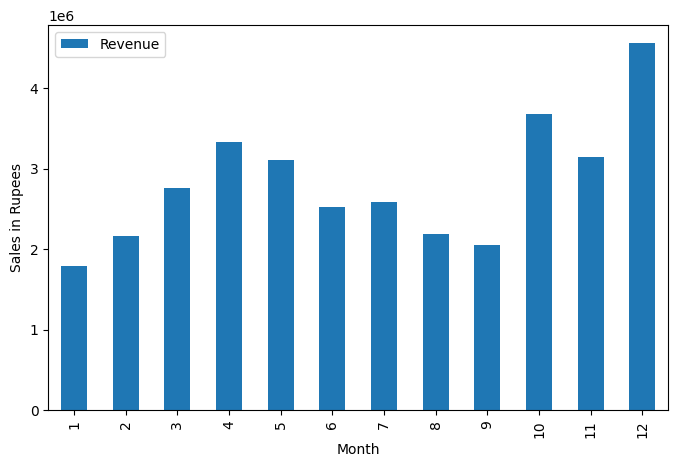

In [8]:
new_table.plot(kind='bar', y='Revenue', ylabel='Sales in Rupees', figsize=(8,5))

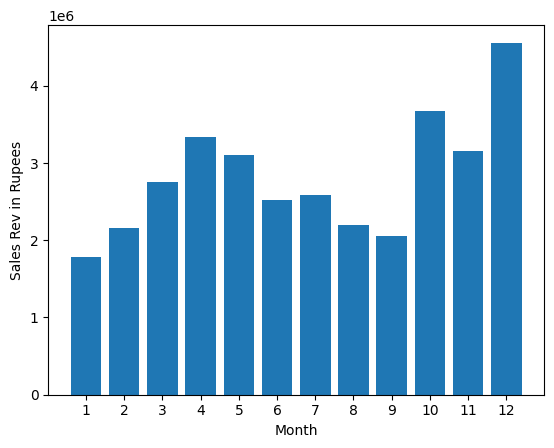

In [9]:
plt.bar(new_table.index, new_table['Revenue'])
plt.xticks(new_table.index)
plt.xlabel('Month')
plt.ylabel('Sales Rev in Rupees')
plt.show()

### Which city has highest number of sales

In [118]:
data['City'] = data['Purchase Address'].str.extract(r',\s*([^,]+),')

In [126]:
city_table = data.groupby('City').sum()

/var/folders/pw/1y12vnxd6rsd7mk1hsc9fplm0000gn/T/ipykernel_45982/3974991487.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_table = data.groupby('City').sum()


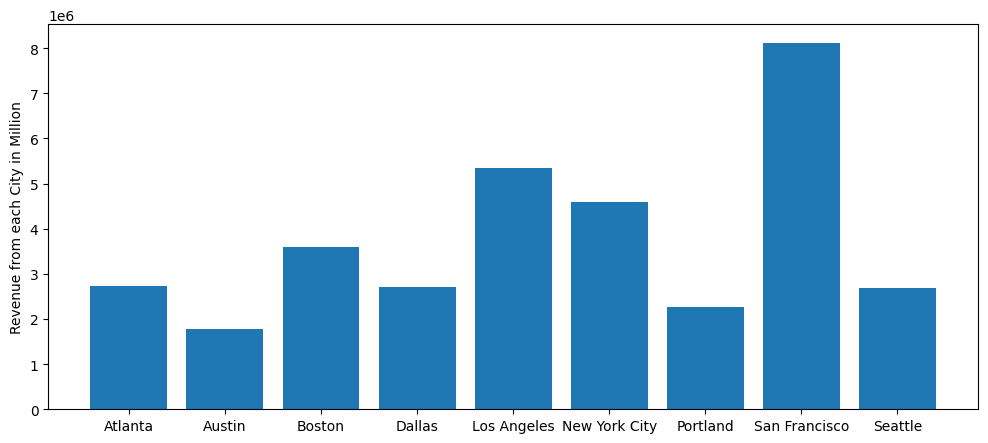

In [188]:
plt.figure(figsize=(12,5))
plt.bar(city_table.index, city_table['Revenue'])
# plt.xlabel("Cities")
plt.ylabel("Revenue from each City in Million")
plt.show()

# At what time of the day do we have to increase the advertisements?

In [175]:
data['Hours'] = data['Order Date'].dt.hour

In [220]:
hours_table = data.groupby(['Hours']).count()

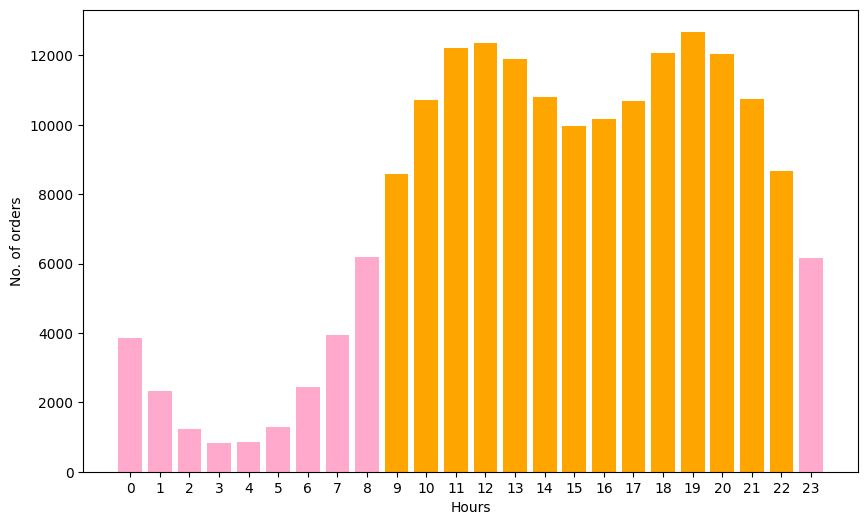

In [237]:
# hours_table
plt.figure(figsize=(10,6))
# plt.bar(hours_table.index, hours_table['Revenue'])
temp = hours_table.sort_values("Revenue", ascending= False)
plt.bar(temp.index[:14], temp['Revenue'].iloc[:14], color='orange')
plt.bar(temp.index[14:], temp['Revenue'].iloc[14:], color='#FFAACC')
plt.xticks(hours_table.index)
plt.xlabel("Hours")
plt.ylabel("No. of orders")
plt.show()

/var/folders/pw/1y12vnxd6rsd7mk1hsc9fplm0000gn/T/ipykernel_45982/3725307220.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(temp.index[:10], temp['Revenue'][:10], color='orange')


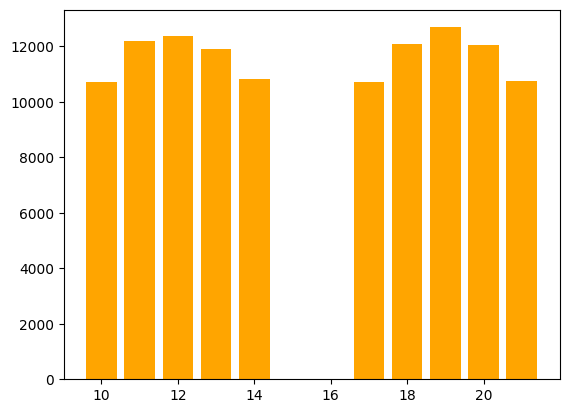

In [229]:
plt.bar(temp.index[:10], temp['Revenue'][:10], color='orange')
plt.show()

# What products are often sold together?
<span style='color:red'> Yet to complete </span>

In [250]:
"""I think products sold together are grouped under same order ID"""
# data.drop(['level_0'])
data.shape

(182735, 10)

In [318]:
data[data['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,Hours
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11
...,...,...,...,...,...,...,...,...,...,...
182646,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland,0
182658,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City,8
182659,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City,8
182694,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin,22


In [321]:
data['Order ID'].count() - len(data['Order ID'].unique())

7286

In [322]:
7286*2

14572

# Which product is the most sold?

In [331]:
product_table = data.groupby('Product', as_index=False).sum()

/var/folders/pw/1y12vnxd6rsd7mk1hsc9fplm0000gn/T/ipykernel_45982/2273721305.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_table = data.groupby('Product', as_index=False).sum()


In [344]:
prices = data.groupby('Product').mean()['Price Each']

/var/folders/pw/1y12vnxd6rsd7mk1hsc9fplm0000gn/T/ipykernel_45982/3712525471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = data.groupby('Product').mean()['Price Each']


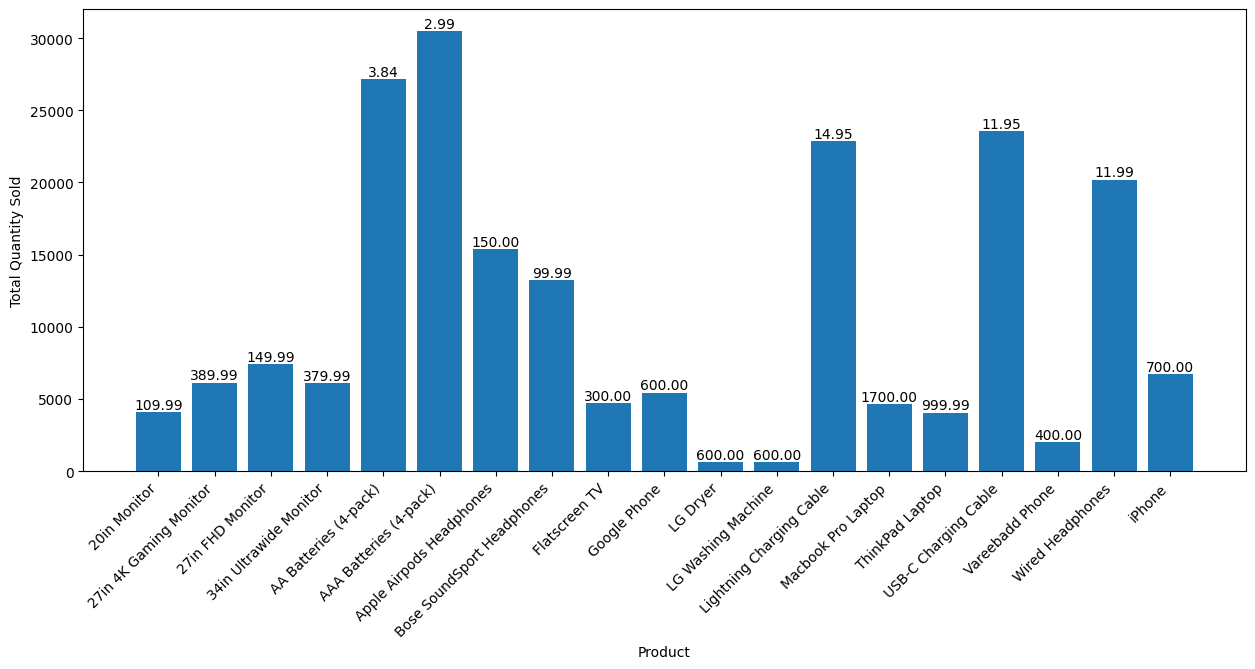

In [383]:
plt.figure(figsize=(15,6))
ax = plt.bar(product_table['Product'], product_table['Quantity Ordered'])
for idx, value in enumerate(prices):
    plt.text(product_table['Product'][idx], product_table['Quantity Ordered'][idx], "{:.2f}".format(value), ha='center', va='bottom')
plt.xlabel("Product")
plt.xticks(rotation=45, ha='right')
plt.xticks
plt.ylabel("Total Quantity Sold")

plt.show()

In [368]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [384]:
"{:.2f}".format(prices[1])

'389.99'

In [388]:
f"{prices[1]:.2f}"

'389.99'

# The below program shows how to display a bar graph with text over the rectangles

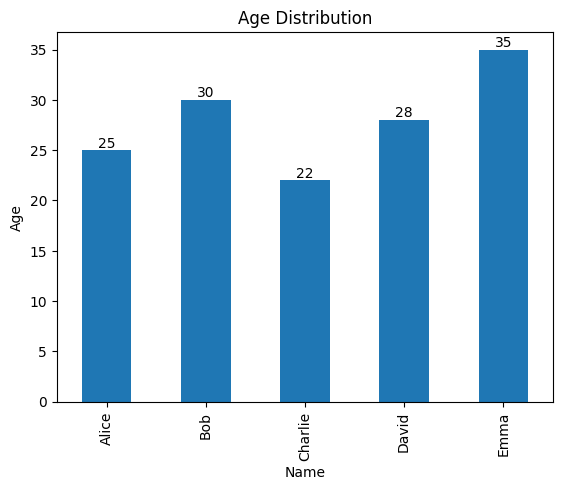

In [362]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'Age': [25, 30, 22, 28, 35]
}
df = pd.DataFrame(data)

# Plot a bar chart using the 'plot()' method
ax = df.plot(x='Name', y='Age', kind='bar', legend=False)

# Set the labels and title
plt.xlabel('Name')
plt.ylabel('Age')
plt.title('Age Distribution')

# Add text labels on top of each bar
for index, value in enumerate(df['Age']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()
